In [26]:
%pylab
%matplotlib inline
import librosa
import scipy

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
%store -r song_data
%store -r harm_perc
(song, fs) = song_data
(h, p) = harm_perc

In [73]:
zc = librosa.feature.zero_crossing_rate(h, frame_length=int(0.03*fs), hop_length=int(0.01*fs))
zc.shape

(1, 10500)

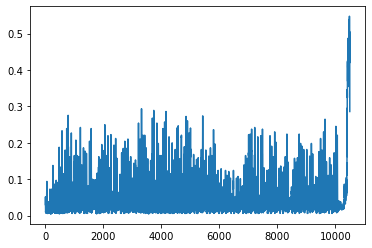

In [74]:
plot(zc.flatten())

In [75]:
zcr = zc.flatten()[:10000]

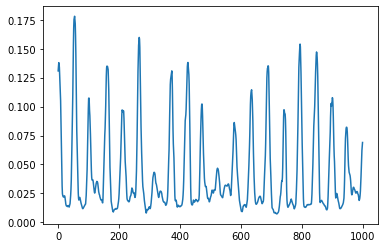

In [76]:
szcr = np.convolve(zcr, np.ones(10)/10)
plot(szcr[2000:3000])

In [38]:
def find_max(arr, n):
    arr = np.concatenate((np.zeros(int(n/2)), np.copy(arr), np.zeros(int(n/2))))
    for i in range(int(n/2), len(arr)-int(n/2)):
        if int(n/2)+1 != np.argmax(arr[i-int(n/2):i+int(n/2)]):
            arr[i] = 0
            
    return arr[int(n/2):-int(n/2)]

In [44]:
def median_smoothing(arr, n):
    med_x = np.median(arr)
    med_dev = scipy.stats.median_abs_deviation(arr)
    x = np.concatenate((med_x*np.ones(n//2), arr, med_x*np.ones(n//2)))
    x_win = np.lib.stride_tricks.sliding_window_view(x, n)
    meds = np.mean(x_win, axis=1) + med_dev
    
    return np.where(arr > meds[:-1], arr, 0)

In [46]:
beats = median_smoothing(szcr, 100)

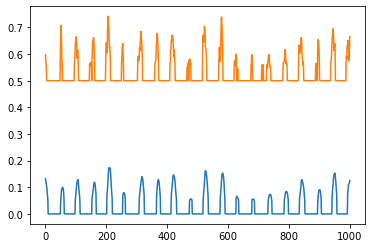

In [80]:
plot(beats[1000:2000])
plot(median_smoothing(zcr, 100)[1000:2000] + 0.5)

In [47]:
peaks = np.where(beats)[0]
dpeaks = peaks[1:]-peaks[:-1]

In [53]:
dpeaks[dpeaks > 1].mean()

40.114754098360656

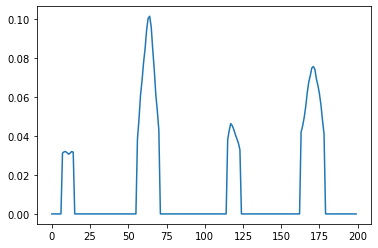

In [55]:
plot(beats[200:400])

In [57]:
mbeats = find_max(beats, 20)

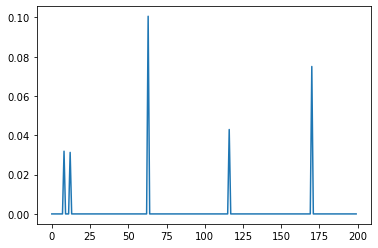

In [59]:
plot(mbeats[200:400])

In [61]:
mpeaks = np.where(mbeats)[0]
dmpeaks = mpeaks[1:] - mpeaks[:-1]

In [62]:
dmpeaks[dmpeaks > 20].mean()

54.02732240437158

In [64]:
60 / (54.027*0.01)

111.05558331945139